# Assignment 3

## Mark Haskins

#### Importing libraries

In [823]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pylab as pl
from sklearn.model_selection import KFold
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import feature_selection
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from numpy import *
from sklearn.metrics import completeness_score, homogeneity_score

### Problem 1a

#### Load into Pandas dataframe. Remove state and community name

In [824]:
communities = pd.read_csv("communities.csv")
columns = ['state', 'communityname']
communities.drop(columns, inplace=True, axis=1)
communities.head(5)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


#### Unable to find the missing values. Attempt to strore them as a list and print, but it returns 0 elements. 

In [825]:
a = communities.columns[communities.isnull().any()].tolist()
a = [col for col in communities.columns if communities[col].isnull().any()]
print(a)

[]


#### After attempting linear regression further down, realise there is a '?' causing the error. Use lambda function to locate row and column and pass as index. Single '?' value in the OtherPerCap column. 

In [826]:
badvalue = '?'
mask = communities.applymap(lambda x: badvalue in x.lower() if isinstance(x,str) else False).to_numpy()
indx = np.argwhere(mask)
r = indx[0][0]
c = indx[0][1]
colname = communities.columns[c]
print('Column Name:')
print(colname)
print('Value:')
print(communities.iloc[r,c])

Column Name:
OtherPerCap
Value:
?


#### Take Mean of this column and replace the question mark with it.

In [827]:
a = pd.to_numeric(communities[colname], errors='coerce').mean()

In [828]:
communities.iloc[r,c]= a
print('Replaced Value:')
print(communities.iloc[r,c])

Replaced Value:
0.28474159558454626


#### Basic Summary Statistics

In [829]:
communities.describe(include="all")

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,...,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00,1994.00
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.06,0.46,0.18,0.75,0.15,0.14,0.42,0.49,0.34,0.42,...,0.02,0.22,0.61,0.54,0.63,0.65,0.07,0.23,0.16,0.24
std,0.13,0.16,0.25,0.24,0.21,0.23,0.16,0.14,0.17,0.18,...,0.10,0.23,0.20,0.18,0.20,0.20,0.11,0.20,0.23,0.23
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.01,0.35,0.02,0.63,0.04,0.01,0.34,0.41,0.25,0.30,...,0.00,0.06,0.47,0.42,0.52,0.56,0.02,0.10,0.02,0.07
50%,0.02,0.44,0.06,0.85,0.07,0.04,0.40,0.48,0.29,0.42,...,0.00,0.13,0.63,0.54,0.67,0.70,0.04,0.17,0.07,0.15
75%,0.05,0.54,0.23,0.94,0.17,0.16,0.47,0.54,0.36,0.53,...,0.00,0.28,0.78,0.66,0.77,0.79,0.07,0.28,0.19,0.33


In [830]:
communities.shape

(1994, 98)

#### Create target lables y for ViolentCrimesPerPop and then drop column from existing dataframe. Store remaining matrix as X

In [831]:
y1 = communities['ViolentCrimesPerPop']
X1 = communities.drop('ViolentCrimesPerPop',axis = 1)
X.shape

(2500, 9328)

In [832]:
y = np.array(y1)
X = np.array(X1)
print(y)
print(X)

[0.2  0.67 0.43 ... 0.23 0.19 0.48]
[[0.19 0.33 0.02 ... 0.12 0.26 0.2]
 [0.0 0.16 0.12 ... 0.02 0.12 0.45]
 [0.0 0.42 0.49 ... 0.01 0.21 0.02]
 ...
 [0.16 0.37 0.25 ... 0.08 0.32 0.18]
 [0.08 0.51 0.06 ... 0.03 0.38 0.33]
 [0.2 0.78 0.14 ... 0.11 0.3 0.05]]


#### Use scikit-learn's train_test_split function to create a 20%-80% randomized split of the data

In [833]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

### Problem 1b

#### Perform standard multiple linear regression on data using the scikit-learn Linear Regression module

In [834]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

#### Compute RMSE of full training data

In [835]:
# Compute erros on training instances
p_train = linreg.predict(X_train)
# Constuct an array of errors
err_train = abs(p_train - y_train)
# Dot product of error vector with itself gives us the sum of squared errors
sum_sq_err = np.dot(err_train,err_train)
# Compute RMSE
rmse_train = np.sqrt(sum_sq_err/len(p_train))
print("RMSE on Training Data: ", rmse_train)

RMSE on Training Data:  0.1261959313342669


#### Plot of Correlation beteween predicted and actual values

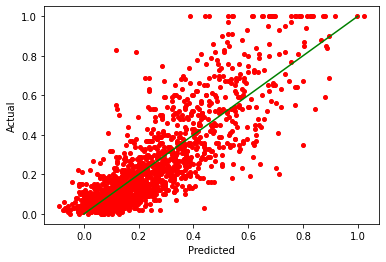

In [836]:
pl.plot(p_train, y_train,'ro', markersize=4)
pl.plot([0,1.0],[0,1.0], 'g-')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

#### Display the obtained regression coefficients (weights) and plot them using matplotlib

In [837]:
def plot_coefficients(model, n_features, feature_names):
    pl.figure(figsize=(20,50))
    pl.barh(range(n_features), model.coef_, align='center')
    pl.yticks(np.arange(n_features),  feature_names, fontsize='small')
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

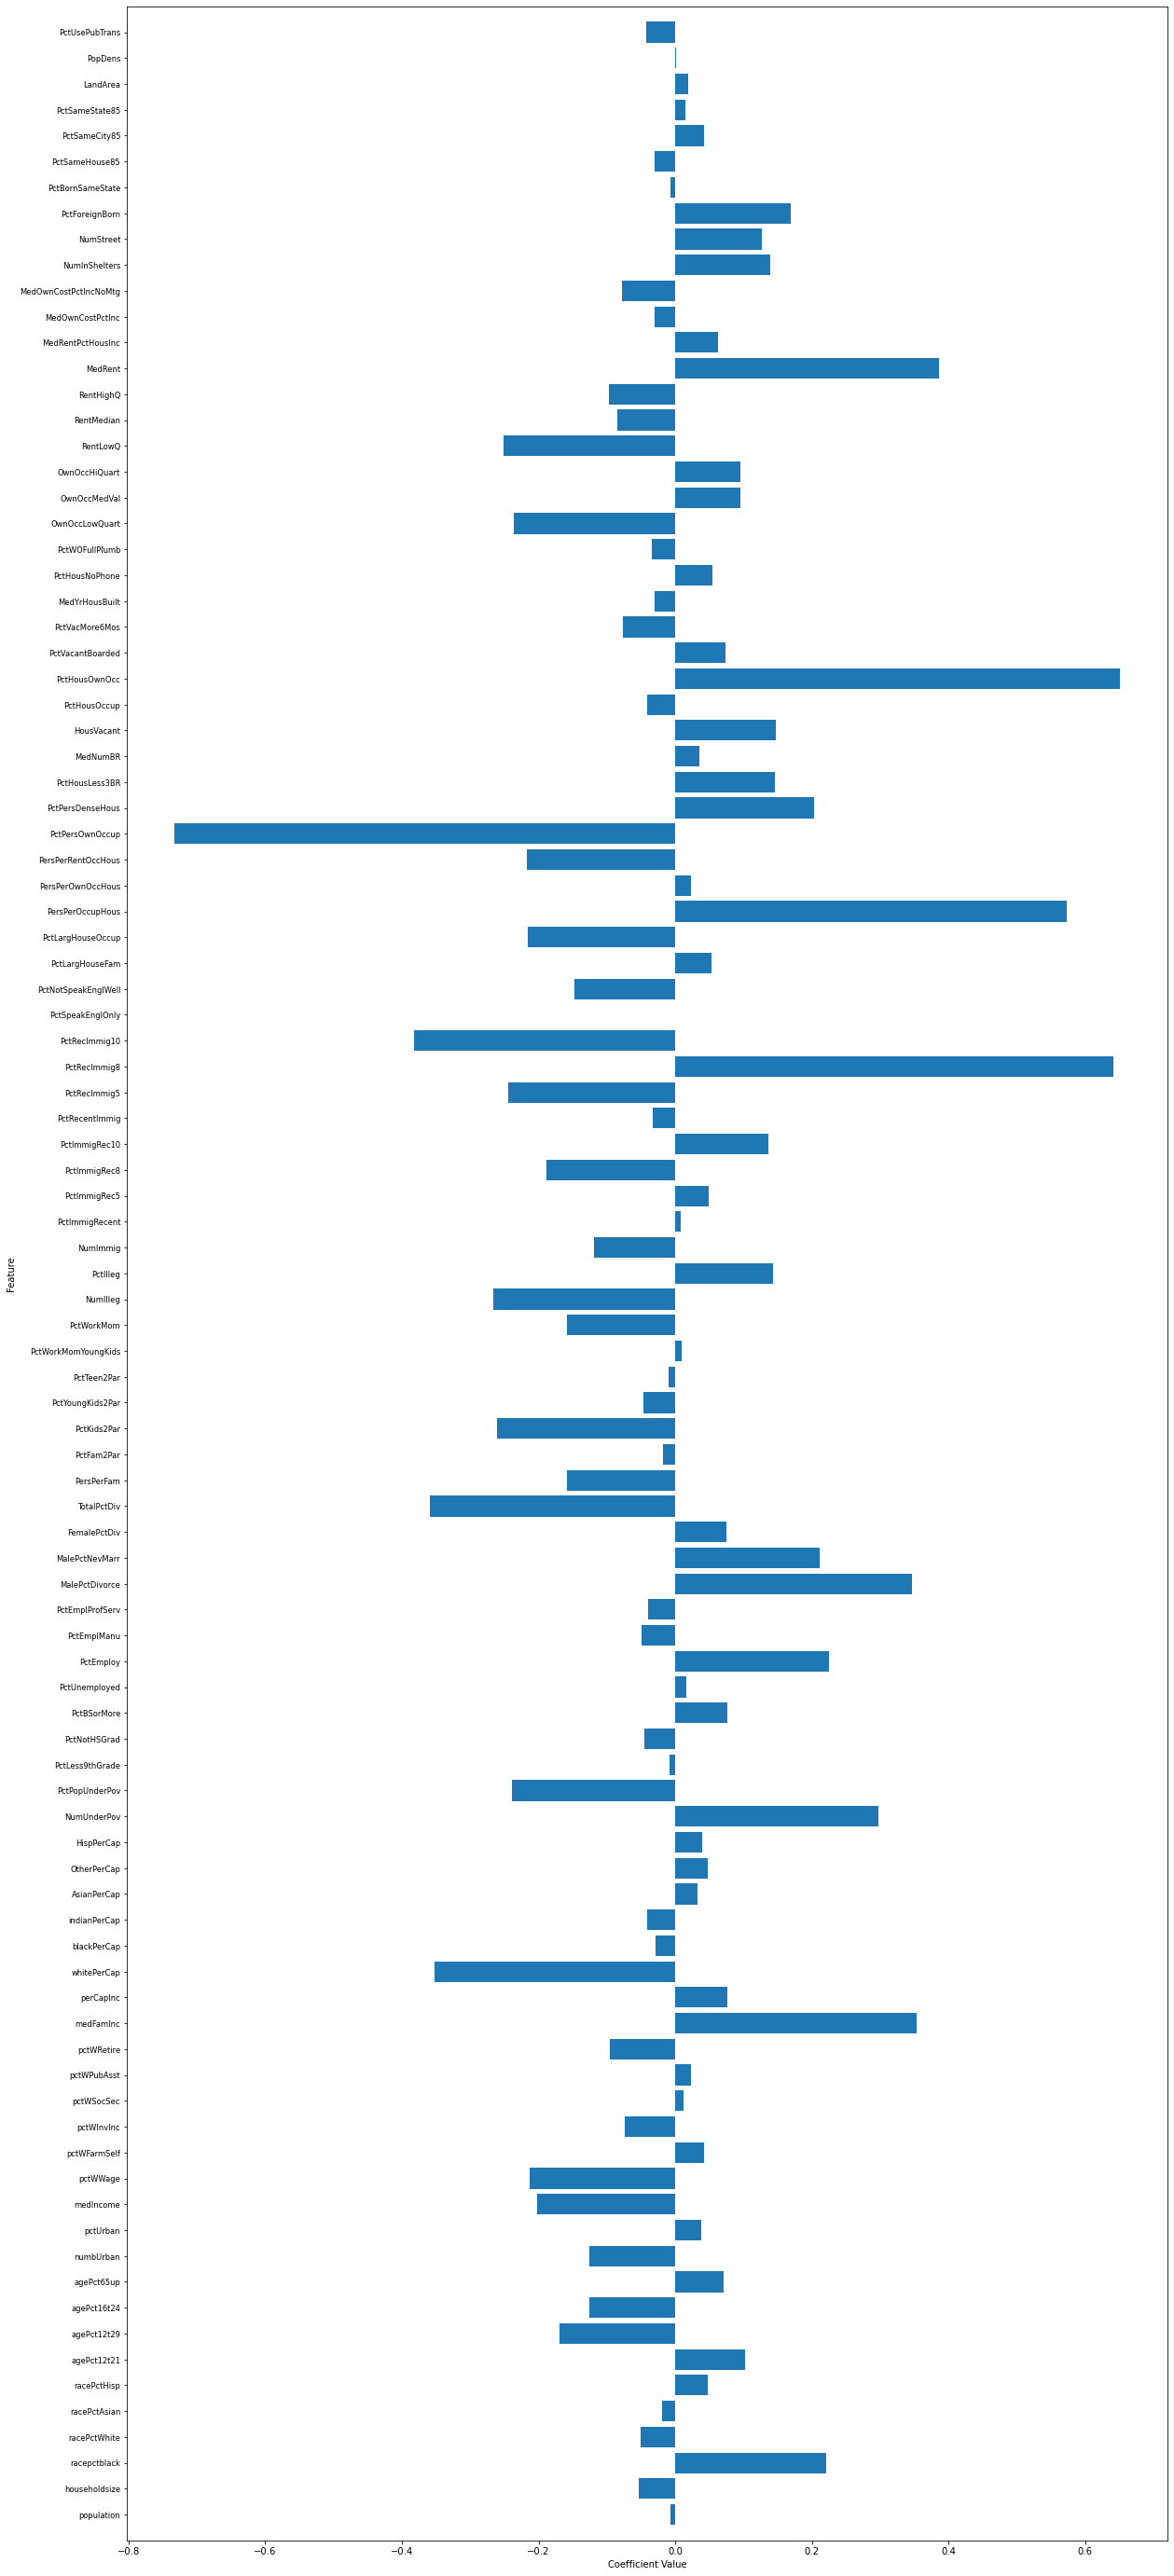

In [838]:
features = X1.columns.values.tolist()
n_features = len(features)
plot_coefficients(linreg, n_features, features)

#### Function to perform 10-fold cross-validation using  KFold module from sklearn.model_selectionon. 

In [839]:
def cross_validate(model, X, y, n, verbose=False):
    # model: regression model to be trained
    # X: the training data matrix
    # y: the training target variable array
    # n: the number of fold for x-validation
    # Returns mean RMSE across all folds    
    kf = KFold(n_splits=n, random_state=22, shuffle=True) # specifying random_state ensures the same random
                                            # partitions are used across different runs
    xval_err = 0
    f = 1
    for train,test in kf.split(X):
        model.fit(X[train],y[train]) # fit model to the training partition in this fold
        p_test = model.predict(X[test]) # apply trained model to test partition in this fold
        rmse_test = np.sqrt(mean_squared_error(p_test, y[test]))
        if verbose:
            print("Fold %2d RMSE: %.4f" % (f, rmse_test))
        xval_err += rmse_test
        f += 1
    return xval_err/n

#### Using above function to perform 10 fold cross-validation on training partition

In [840]:
rmse_10cv = cross_validate(linreg, X_train, y_train, 10, verbose=True)

Fold  1 RMSE: 0.1300
Fold  2 RMSE: 0.1123
Fold  3 RMSE: 0.1299
Fold  4 RMSE: 0.1287
Fold  5 RMSE: 0.1332
Fold  6 RMSE: 0.1220
Fold  7 RMSE: 0.1681
Fold  8 RMSE: 0.1388
Fold  9 RMSE: 0.1326
Fold 10 RMSE: 0.1517


#### Comparing the cross-validation RMSE to the training RMSE. The RMSE on the training date is low and the RMSE on the the 10-fold CV is also low with not a large gap between the two values. This is indicating that them model is not underfitting or overfitting. 

In [841]:
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


RMSE on training: 0.1262
RMSE on 10-fold CV: 0.1347


### Problem 1c

#### Function optimal_percent that takes as input the training data; target variable; the regression model, and n folds for cross validation and returns an optimal percentage to use for feature selection, along with the percentiles and results 

In [842]:
def optimal_percent(model, X, y, n):        
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X , y)
        scores = cross_val_score(model, X_train_fs, y, cv=n, scoring='neg_mean_absolute_error')
        scores = abs(scores)
        results = np.append(results, scores.mean())
    optimal_percentile_ind = np.where(results == results.max())[0][0]
    opt = percentiles[optimal_percentile_ind]
    return opt, percentiles, results

#### Testing function

In [843]:
o,p,r = optimal_percent(linreg, X_train, y_train, 5)
print('Optimal Value: ')
print(o)

Optimal Value: 
1


#### Plot showing model's error values on cross-validation using only the selected features across the range of percentile values

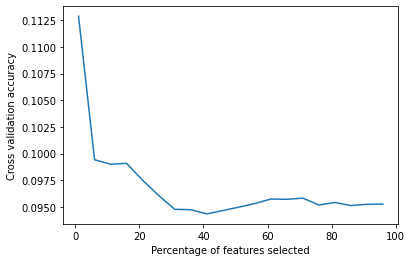

In [844]:
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(p,r)
pl.show()

#### Using above optimal percentile as to identify and display best feature 

In [845]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=o)
X_train_fs = fs.fit_transform(X_train, y_train)
print('Best Feature: ')
print(X1.columns[fs.get_support()].values)

Best Feature: 
['PctKids2Par']


#### Training your model on the full 80% training data with the optimal subset of features and then computing it's peformance on the set-aside 20% test partition using MAE

In [846]:
def measure_performance(X, y, model, metric = metrics.mean_absolute_error):
    y_pred = model.predict(X)
    score = metric(y, y_pred)
    return score

In [847]:
linregO = LinearRegression()
linregO.fit(X_train_fs, y_train)
X_test_fs = fs.transform(X_test)
mae = measure_performance(X_test_fs, y_test, linregO)
print("Mean Absolute Error: ", mae)


Mean Absolute Error:  0.11858339269907872


### Part 1d

#### Function calc_parameters identifies the optimal alpha hyperparamters. It takes input the training data and target variable; the parameter to vary and a list of its values; the model to be trained; and the number of K folds. It returns the training scores, test scores, and produces a plot.

In [848]:
def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print(param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = np.sqrt(measure_performance(X[train], y[train], clf, metric=metrics.mean_squared_error))
            k_test_scores[j] = np.sqrt(measure_performance(X[test], y[test], clf, metric=metrics.mean_squared_error))
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train')#, alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val')#, alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation RMSE")
    plt.show()

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

#### Build a Ridge and Lasso Regression Model along with an array of alpha parameter values to use. 

In [849]:
lasso = Lasso()
ridge = Ridge()
al = np.linspace(.0001,.01,100)
ar = np.linspace(.001,10,100)

#### Call the calc_parameter function for Lasso

alpha  =  0.0001
alpha  =  0.0002
alpha  =  0.00030000000000000003
alpha  =  0.0004
alpha  =  0.0005
alpha  =  0.0006000000000000001
alpha  =  0.0007000000000000001
alpha  =  0.0008
alpha  =  0.0009000000000000001
alpha  =  0.001
alpha  =  0.0011
alpha  =  0.0012000000000000001
alpha  =  0.0013000000000000002
alpha  =  0.0014000000000000002
alpha  =  0.0015
alpha  =  0.0016
alpha  =  0.0017000000000000001
alpha  =  0.0018000000000000002
alpha  =  0.0019000000000000002
alpha  =  0.002
alpha  =  0.0021
alpha  =  0.0022
alpha  =  0.0023
alpha  =  0.0024
alpha  =  0.0025
alpha  =  0.0026
alpha  =  0.0027
alpha  =  0.0028
alpha  =  0.0029
alpha  =  0.003
alpha  =  0.0031
alpha  =  0.0032
alpha  =  0.0033
alpha  =  0.0034
alpha  =  0.0035
alpha  =  0.0036
alpha  =  0.0037
alpha  =  0.0038
alpha  =  0.0039
alpha  =  0.004
alpha  =  0.0041
alpha  =  0.004200000000000001
alpha  =  0.004300000000000001
alpha  =  0.0044
alpha  =  0.0045000000000000005
alpha  =  0.004600000000000001
alpha  =  0.00

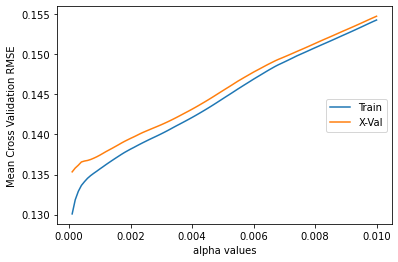

In [850]:
train_scores, test_scores = calc_params(X1, y1, lasso, al, 'alpha', 5)

#### Call the calc_parameter function for Ridge

alpha  =  0.001
alpha  =  0.10200000000000001
alpha  =  0.203
alpha  =  0.30400000000000005
alpha  =  0.405
alpha  =  0.506
alpha  =  0.6070000000000001
alpha  =  0.7080000000000001
alpha  =  0.809
alpha  =  0.91
alpha  =  1.011
alpha  =  1.1119999999999999
alpha  =  1.213
alpha  =  1.314
alpha  =  1.415
alpha  =  1.516
alpha  =  1.617
alpha  =  1.718
alpha  =  1.819
alpha  =  1.92
alpha  =  2.021
alpha  =  2.122
alpha  =  2.223
alpha  =  2.324
alpha  =  2.4250000000000003
alpha  =  2.5260000000000002
alpha  =  2.6270000000000002
alpha  =  2.728
alpha  =  2.829
alpha  =  2.93
alpha  =  3.031
alpha  =  3.132
alpha  =  3.233
alpha  =  3.334
alpha  =  3.435
alpha  =  3.536
alpha  =  3.637
alpha  =  3.738
alpha  =  3.839
alpha  =  3.94
alpha  =  4.041
alpha  =  4.142
alpha  =  4.243
alpha  =  4.344
alpha  =  4.445
alpha  =  4.546
alpha  =  4.647
alpha  =  4.748
alpha  =  4.849000000000001
alpha  =  4.950000000000001
alpha  =  5.051000000000001
alpha  =  5.152000000000001
alpha  =  5.253000

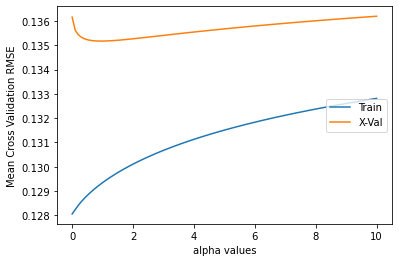

In [851]:
train_scores, test_scores = calc_params(X1, y1, ridge, ar, 'alpha', 5)

#### After looking at the graph for Lasso, I see that there is possible underfitting or high bias as the training and test error rates seem to converge and get higher at higher levels of alpha. I select an alpha of 0.0001 to build the optimal model.

In [852]:
lassoO = Lasso(alpha=0.0001)
lassoO.fit(X_train, y_train)
lassoO_mae = measure_performance(X_test, y_test, lassoO)
print("Lasso Mean Absolute Error: ", lassoO_mae)

Lasso Mean Absolute Error:  0.09996323464912328


#### After looking at the graph for Ridge, I see that there is possible overfitting or high variance as the training and test error rates seem do not seem to converge but stay the same distance apart accross higher levels of alpha with both error rates only slightly positively increasing. I select an alpha of 0.5 to build the optimal model.

In [853]:
ridgeO = Ridge(alpha=0.5)
ridgeO.fit(X_train, y_train)
ridgeO_mae = measure_performance(X_test, y_test, ridgeO)
print("Ridge Mean Absolute Error: ", ridgeO_mae)

Ridge Mean Absolute Error:  0.10047898138765145


### Problem 1e

#### Perform the scaling using StandardScaler from sklearn.preprocessing. 

In [854]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

#### Perform Grid Search using combination of two penalty parameters ('l2', 'l1') and different values of alpha from 0.0001 to 10.

In [855]:
sgdreg = SGDRegressor()
parameters = {
    'penalty': ['l1','l2'],
    'alpha': np.linspace(0.0001, 10, 100),
}
gs = GridSearchCV(sgdreg, parameters, verbose=1, cv=5)
%time _ = gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 1min 30s
Wall time: 24.5 s


({'alpha': 0.0001, 'penalty': 'l1'}, 0.6401865907119803)

#### Train Model using best parameters and calculating RMSE scores. 

In [856]:
sgdreg = SGDRegressor(penalty='l2', alpha=0.0001)
sgdreg.fit(X_train_s,y_train)
p_train = sgdreg.predict(X_train_s)
rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
p_test = sgdreg.predict(X_test_s) # predictions on the test instances
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))

In [857]:
method_name = 'Stochastic Gradient Descent Regression'
print("\n")
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on test data: %.4f' %rmse_test)



Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1314
RMSE on test data: 0.1466


Finally, perform model optimization (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Provide a brief summary of your findings from the above experiments.

#### Perform model optimization to find the best l1_ratio parameter using SGDRregssor with the elastic net penalty parmaeter and alpha from above. 

l1_ratio  =  0.0
l1_ratio  =  0.010101010101010102
l1_ratio  =  0.020202020202020204
l1_ratio  =  0.030303030303030304
l1_ratio  =  0.04040404040404041
l1_ratio  =  0.05050505050505051
l1_ratio  =  0.06060606060606061
l1_ratio  =  0.07070707070707072
l1_ratio  =  0.08080808080808081
l1_ratio  =  0.09090909090909091
l1_ratio  =  0.10101010101010102
l1_ratio  =  0.11111111111111112
l1_ratio  =  0.12121212121212122
l1_ratio  =  0.13131313131313133
l1_ratio  =  0.14141414141414144
l1_ratio  =  0.15151515151515152
l1_ratio  =  0.16161616161616163
l1_ratio  =  0.17171717171717174
l1_ratio  =  0.18181818181818182
l1_ratio  =  0.19191919191919193
l1_ratio  =  0.20202020202020204
l1_ratio  =  0.21212121212121213
l1_ratio  =  0.22222222222222224
l1_ratio  =  0.23232323232323235
l1_ratio  =  0.24242424242424243
l1_ratio  =  0.25252525252525254
l1_ratio  =  0.26262626262626265
l1_ratio  =  0.27272727272727276
l1_ratio  =  0.2828282828282829
l1_ratio  =  0.29292929292929293
l1_ratio  =  0.303030303

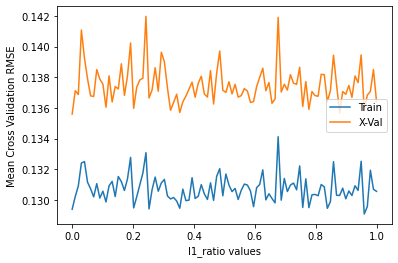

In [858]:
sgdregO = SGDRegressor(penalty='elasticnet', alpha=0.0001)
l1r = np.linspace(0.0, 1.0, 100)
train_scores, test_scores = calc_params(X_train_s, y_train, sgdregO, l1r, 'l1_ratio', 5)

#### Using the best mix of alpha, elasticnet, and l1_ratio, apply the Elastic Net model, trained on full training data, to the set-aside test data and compare to the training perfromance. Model with the tuned parameters was more accurate. This is expeceted as the parameters were tuned and th full training data leveraged. 

In [859]:
sgdregB = SGDRegressor(penalty='elasticnet', alpha=0.0001, l1_ratio = .06)
sgdregB.fit(X_train_s, y_train)
sgdregB_mae = measure_performance(X_test_s, y_test, sgdregB)
print("SGDRegressor ElasticNet Mean Absolute Error: ", sgdregB_mae)

SGDRegressor ElasticNet Mean Absolute Error:  0.10268596685026896


#### Briefy summary of findings: 
#### After looking at the graph for Ridge, I see that there is possible overfitting or high variance as the training and test error rates seem do not seem to converge but stay the same distance apart accross different levels of l1_ratio penalty with both error rates following a very up and down (wave) pattern. I chose the .06 penalty as that seemed to provide the lowest error with more or less the same overfitting gap. The SGDR model with elastic net did seem to perform better than the lasso but not as well as the ridge. 

### Problem 2a

#### Create distance function using consine similarity

In [860]:
def distCosine(vecA, vecB):
    dp = np.dot(vecA, vecB)
    l2a = np.sqrt(np.sum(vecA**2))
    l2b = np.sqrt(np.sum(vecB**2))
    return 1 - dp / (l2a * l2b)

#### Testing and calling function for accuracy

In [861]:
x = np.array([1, 2, 3])
y =  np.array([3,5,7])

ans = distCosine(x,y)
print(ans)

0.002585096956942312


### Problem 2b

#### Load the data set 

In [862]:
#data is term (row) by document (column)
TD = pd.read_csv("matrix.txt", header=None)
TD

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9324,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [863]:
#Transpose document(row) by term(column)
DT = TD.T
DT

,0,1,2,3,4,5,6,7,8,9,...,9318,9319,9320,9321,9322,9323,9324,9325,9326,9327
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [864]:
terms = pd.read_csv("terms.txt", header=None)

In [865]:
classes = pd.read_csv("classes.txt", sep=" ", header=None,skiprows=1)
classes = classes[1]
classes

0       0
1       1
2       1
3       1
4       2
       ..
2495    4
2496    4
2497    3
2498    4
2499    2
Name: 1, Length: 2500, dtype: int64

In [866]:
y = np.array(classes)
X = np.array(DT)

#### Use the train_test_split function (with random_state = 99) to perform a randomized split the data set (the document by term matrix)

In [867]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

#### PerformTFxIDF Conversion

In [868]:
numTerms=TD.shape[0]
NDocs = TD.shape[1]
DF = pd.DataFrame([(TD!=0).sum(1)]).T
NMatrix=np.ones(np.shape(TD), dtype=float)*NDocs
np.set_printoptions(precision=2,suppress=True,linewidth=120)
print(NMatrix)

[[2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 ...
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]
 [2500. 2500. 2500. ... 2500. 2500. 2500.]]


In [869]:
IDF = np.log2(np.divide(NMatrix, np.array(DF)))
np.set_printoptions(precision=2,suppress=True)
IDFT = IDF.T
X_train = X_train * IDFT[:2000,:]
X_test_idf = X_test * IDFT[:500,:]
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Problem 2c

In [870]:
def distEuclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
	n = shape(dataSet)[1]
	centroids = zeros((k,n), dtype=float)
	for j in range(n): #create random cluster centers
		minJ = min(dataSet[:,j])
		rangeJ = float(max(dataSet[:,j]) - minJ)
		centroids[:,j] = minJ + rangeJ * random.rand(k)
	return centroids 

def kMeans(dataSet, k, distMeas=distEuclid, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2)) #create mat to assign data points 
                                  #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m): #for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEuclid):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1]) #compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0] #replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss #reassign new clusters, and SSE
    return mat(centList), clusterAssment

#### Function to display cluster report

In [871]:
centroids, clusterAssment = kMeans(X_train, 5, distCosine, randCent)
centroidsDF = pd.DataFrame(centroids, columns = terms)
cluster_array = clusterAssment[:,0].astype(int) 

def cluster_sizes(data, cluster_array):
    size = {}
    cluster_labels = np.unique(cluster_array)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(data[cluster_array == c])
    return size

c_size = cluster_sizes(X_train, cluster_array)

termsA = np.array(terms)
def cluster_report(arr,numterms, terms, c_s):
    for r,c, in zip(arr, c_size):
        print("Size of Cluster", c, "= ", c_size[c])
        sorted_index_array = np.argsort(r)
        indx = sorted_index_array[::-1][:numterms]
        print()
        print("Top Terms:")
        print(terms[indx])
        print()
        print("Freq:")
        print(r[indx])
        print()
cluster_report(centroids, 5 ,termsA,c_size )

Size of Cluster 0 =  3

Top Terms:
[['db']
 ['bh']
 ['cs']
 ['si']
 ['byte']]

Freq:
[1468.36  345.21  204.04  182.02  148.6 ]

Size of Cluster 1 =  398

Top Terms:
[['kei']
 ['chip']
 ['encrypt']
 ['secur']
 ['clipper']]

Freq:
[5.6  3.98 3.92 3.31 3.24]

Size of Cluster 2 =  803

Top Terms:
[['god']
 ['christian']
 ['cx']
 ['game']
 ['team']]

Freq:
[3.83 2.47 2.39 2.28 2.05]

Size of Cluster 3 =  789

Top Terms:
[['window']
 ['file']
 ['driver']
 ['do']
 ['sale']]

Freq:
[3.13 2.23 1.5  1.49 1.38]

Size of Cluster 4 =  7

Top Terms:
[['ax']
 ['max']
 ['pl']
 ['giz']
 ['bxn']]

Freq:
[41371.61  2826.98   296.54   229.69   132.6 ]



#### After trying different clusters of 4-8 for value of K, it seems that 5 provided the most clarity in terms of word groups.

In [872]:
centroids, clusterAssment = kMeans(X_train, 5, distCosine, randCent)
centroids = pd.DataFrame(centroids, columns = terms)
centroids

,"(aa,)","(aargh,)","(aaron,)","(aaronc,)","(ab,)","(abandon,)","(abc,)","(abid,)","(abil,)","(abl,)",...,"(zq,)","(zr,)","(zrb,)","(zs,)","(zu,)","(zubov,)","(zv,)","(zw,)","(zx,)","(zz,)"
0,0.02,0.00,1.24,0.23,0.04,0.12,0.00e+00,0.00,0.28,0.41,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,0.04,0.13,0.00,0.00,0.13,0.04,7.36e-01,0.00,0.14,0.23,...,0.19,0.18,0.07,0.09,0.1,0.13,0.45,0.05,0.05,0.26
2,0.00,0.00,0.00,0.00,1.08,0.00,0.00e+00,0.00,0.00,0.00,...,0.00,1.28,0.00,9.95,0.0,0.00,0.00,1.39,0.00,0.00
3,0.05,0.00,0.05,0.00,0.04,0.02,7.99e-03,0.00,0.05,0.26,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,3.16e-02,0.05,0.28,0.46,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00


### Problem 2d

#### Using the cluster assignments from your Kmeans clustering and the original cluster labels for the training document, compare the clusters to the re-assigned classes by computing the Completeness and Homogeneity values using best values of K and clustering from above



In [873]:
doc_clusters = pd.DataFrame(clusterAssment, columns=["Cluster", "MinDistance**2"])
newC = doc_clusters["Cluster"].astype(int)
print("Completeness Score:")
print(completeness_score(y_train,newC))
print()
print("Homogeneity Score:")
print(homogeneity_score(y_train,newC))

Completeness Score:
0.860351323448776

Homogeneity Score:
0.7217533686358573


### Problem 2d Extra Credit

In [874]:
centroids1, clusterAssment1 = kMeans(X_train, 5, distCosine, randCent)
doc_clusters = pd.DataFrame(clusterAssment1, columns=["Cluster", "MinDistance**2"])
newC = doc_clusters["Cluster"].astype(int)
print("Completeness Score:")
print(completeness_score(y_train,newC))
print()
print("Homogeneity Score:")
print(homogeneity_score(y_train,newC))

Completeness Score:
0.746107762504485

Homogeneity Score:
0.32568495309687034


In [875]:
centroids2, clusterAssment2 = kMeans(X_train, 4, distCosine, randCent)
doc_clusters = pd.DataFrame(clusterAssment2, columns=["Cluster", "MinDistance**2"])
newC = doc_clusters["Cluster"].astype(int)
print("Completeness Score:")
print(completeness_score(y_train,newC))
print()
print("Homogeneity Score:")
print(homogeneity_score(y_train,newC))

Completeness Score:
0.8177012274604758

Homogeneity Score:
0.5461875951945434


In [876]:
centroids3, clusterAssment3 = kMeans(X_train, 6, distCosine, randCent)
doc_clusters = pd.DataFrame(clusterAssment3, columns=["Cluster", "MinDistance**2"])
newC = doc_clusters["Cluster"].astype(int)
print("Completeness Score:")
print(completeness_score(y_train,newC))
print()
print("Homogeneity Score:")
print(homogeneity_score(y_train,newC))

Completeness Score:
0.7752779139606654

Homogeneity Score:
0.5582475986194864


#### After completing mutliple runs, I decided to use 4, 5, and 5 for my value of K. I see as I use lower values the completeness score is more accurate which is expected, but the word groups aren't as clear at lower levels.

### Problem 2e

[10 pts] Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate clusters (using your final clustering results in part c). Your categorization should be based on Cosine similarity between each test document and cluster centroids. For each test document show the assigned cluster label as well as Cosine similarity to the corresponding cluster.

#### I was unsure of what this problem was asking